## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [1]:
# Erin Lee
# Jp Ventura and Julian Ward

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
%matplotlib inline

In [6]:
# Grabing data from im.db file
con = con = sqlite3.connect('zippedData/im.db')
df = pd.read_sql_query('SELECT * FROM movie_basics', con)
df = pd.read_sql_query('''
SELECT start_year, genres, AVG(averagerating) as avg_rating
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
GROUP BY start_year, genres
ORDER BY start_year, avg_rating DESC
''', con)
df.head()


,start_year,genres,avg_rating
0,2010,"Documentary,Family,Romance",9.70
1,2010,"Action,Documentary,Sport",9.20
2,2010,"Documentary,Drama,Music",9.10
3,2010,"Comedy,Documentary,Romance",9.10
4,2010,"Documentary,Family,News",8.95


In [22]:
# Getting the movie with genre
df = pd.read_sql_query('''SELECT * FROM movie_basics JOIN movie_ratings USING (movie_id)''', con)
df.head()
df = df[['primary_title', 'start_year', 'genres', 'averagerating']]
df.head()

# exploding the genres so that we can analyise them seperately
df['genres'] = df['genres'].map(lambda x: x if x is None else x.split(','))
df = df.explode('genres')
final_genre_data = df.groupby(['start_year', 'genres']).mean()
genre2019 = df[df['start_year'] == 2019].groupby(['genres']).mean()


<AxesSubplot:title={'center':'2019 Average Movie Genre Ratings'}, ylabel='genres'>

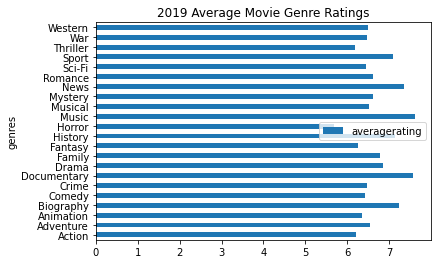

In [23]:
# Graph plotting the average genre ratings in 2019 
genre2019.plot(y='averagerating', kind='barh', title='2019 Average Movie Genre Ratings')

<AxesSubplot:title={'center':'2018 Average Movie Genre Ratings'}, ylabel='genres'>

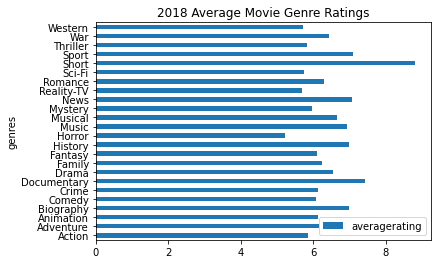

In [24]:
# Graph plotting the average genre ratings in 2018 
genre2018 = df[df['start_year'] == 2018].groupby(['genres']).mean()
genre2018.plot(y='averagerating', kind='barh', title='2018 Average Movie Genre Ratings')

<AxesSubplot:title={'center':'2017 Average Movie Genre Ratings'}, ylabel='genres'>

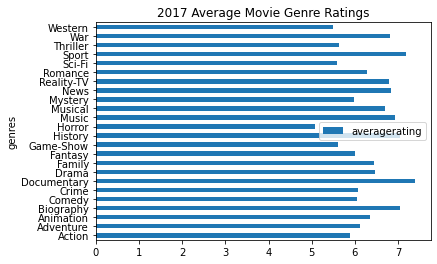

In [25]:
# Graph plotting the average genre ratings in 2017 
genre2018 = df[df['start_year'] == 2017].groupby(['genres']).mean()
genre2018.plot(y='averagerating', kind='barh', title='2017 Average Movie Genre Ratings')

In [ ]:
#Looks like it was pretty similar over the last 3 years. Documentary, sport and music seem to be very popular

In [34]:
# List of other data sources. I was specifically working on genre so I looked through the list to find ones with genre categories

data1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data2= pd.read_csv('zippedData/tmdb.movies.csv.gz') # has genre
data3= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
data4 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep ='\t') # has genre
data5 = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding = 'latin1', sep ='\t')
con = sqlite3.connect('zippedData/im.db')
#df = pd.read_sql_query("""SELECT name FROM sqlite_schema 
#WHERE type IN ('table','view') 
#AND name NOT LIKE 'sqlite_%'
#ORDER BY 1""",con)
df = pd.read_sql_query('''
SELECT start_year, genres, AVG(averagerating) as avg_rating
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
GROUP BY start_year, genres
ORDER BY start_year, avg_rating DESC
''', con)

#data4.head(20)

In [35]:
data2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
df = pd.read_sql_query('''SELECT * FROM movie_basics JOIN movie_ratings USING (movie_id)''', con)
df.head()

df = df[['primary_title', 'start_year', 'genres', 'averagerating']]
df.head()

df['genres'] = df['genres'].map(lambda x: x if x is None else x.split(','))
df = df.explode('genres')

df = df[['genres','averagerating']].groupby(['genres']).mean()

# Initial Analysis of movie_info

In [4]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
data4.dropna(subset=['genre'], inplace=True) # drop any rows that has NaN for genre

In [6]:
data4.head(20)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [7]:
data4.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [8]:
data4['genre'].value_counts()

Drama                                                                      151
Comedy                                                                     110
Comedy|Drama                                                                80
Drama|Mystery and Suspense                                                  67
Art House and International|Drama                                           62
                                                                          ... 
Action and Adventure|Drama|Special Interest                                  1
Comedy|Documentary|Science Fiction and Fantasy|Special Interest              1
Classics|Comedy|Drama|Kids and Family|Science Fiction and Fantasy            1
Classics|Drama|Musical and Performing Arts|Mystery and Suspense              1
Classics|Drama|Mystery and Suspense|Science Fiction and Fantasy|Romance      1
Name: genre, Length: 299, dtype: int64

# tmdb movie analysis

In [38]:
#Combining data sets
df = pd.read_sql_query('''SELECT * FROM movie_basics JOIN movie_ratings USING (movie_id)''', con)
tmdb = data2
tmdb_combined = tmdb.set_index('title').join(df.set_index('primary_title'), rsuffix='_reviews', how='inner')
joined = tmdb_combined
tmdb_combined['genres'] = tmdb_combined['genres'].map(lambda x: x if x is None else x.split(','))
tmdb_combined = tmdb_combined.explode('genres')[['start_year', 'genres', 'vote_average']]
tmdb_combined_years = tmdb_combined.groupby(['start_year', 'genres']).mean()
tmdb_combined_mean = tmdb_combined.groupby(['genres']).mean()

In [40]:
#Kept getting errors trying to open this so leaving here in case I need to check
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [41]:
# Checking the combined data table
tmdb_combined_mean

,start_year,vote_average
genres,,
Action,2014.279334,5.478238
Adult,2015.000000,2.100000
Adventure,2014.318086,5.857495
Animation,2014.244898,6.273265
Biography,2014.094799,6.622483
Comedy,2014.006906,5.716284
Crime,2014.236022,5.753656
Documentary,2014.086605,6.655528
Drama,2014.127391,5.982410


<AxesSubplot:title={'center':'TMDB Average Ratings by Genre'}, ylabel='genres'>

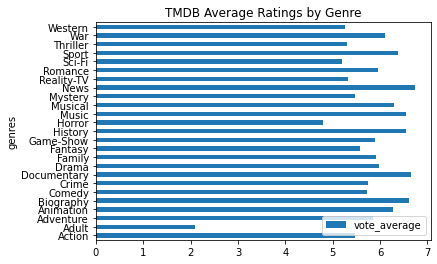

In [39]:
# Graphing the combined data average of genre and rating
tmdb_combined_mean.plot(y='vote_average', kind='barh', title='TMDB Average Ratings by Genre')

In [43]:
# I stopped working in this notebook and ended up working straight into Jack-branch under Final-Workbook with things that Graham and I worked on together for genres